 # Zápočtová úloha – Úloha 2 (rozšířená): Lotka‑Volterra se třemi druhy
*Autor: Zdeněk Touška*  


## 1 · Matematický model
Pro tři populace používáme úpravu Lotka‑Volterra:
\[
\begin{aligned}
\dot x &= \alpha x - \beta_1 x y - \beta_2 x z \\[2pt]
\dot y &= \delta_1 x y - \gamma_1 y - \varepsilon y z \\[2pt]
\dot z &= \delta_2 x z + \varepsilon y z - \gamma_2 z
\end{aligned}
\]
kde  
- **x(t)** – gazely (kořist),  
- **y(t)** – gepardi (predátor 1),  
- **z(t)** – lvi (predátor 2 / super‑predátor).

### Parametry
| Symbol | Význam | Hodnota |
|--------|--------|---------|
| \(\alpha\) | růst gazel bez predátorů | **0.8 /rok** |
| \(\beta_1\) | gepardi loví gazely | **0.04** |
| \(\beta_2\) | lvi loví gazely | **0.02** |
| \(\gamma_1\) | úmrtnost gepardů bez potravy | **0.8 /rok** |
| \(\gamma_2\) | úmrtnost lvů bez potravy | **0.6 /rok** |
| \(\delta_1\) | konverze gazel → gepardi | **0.02** |
| \(\delta_2\) | konverze gazel → lvi | **0.015** |
| \(\varepsilon\) | lev žere geparda (super‑predace) | **0.005** |

**Interpretace:**  
- Lvi predují **gazely** _i_ **gepardy**, takže gepardům ubírá kořist a zároveň je přímo loví (termín \(-\varepsilon y z)\).  
- Lvi získávají energii z obou zdrojů (gazely + gepardi).  
- Pokud parametr \(\varepsilon=0\), model se zredukuje na dva nezávislé predátory sdílející kořist.


## 2 · Importy

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

## 3 · Definice diferenciálních rovnic

In [10]:
def lv3_system(t, u, alpha, beta1, beta2, gamma1, gamma2, delta1, delta2, eps):
    x, y, z = u
    dxdt = alpha * x - beta1 * x * y - beta2 * x * z
    dydt = delta1 * x * y - gamma1 * y - eps * y * z
    dzdt = delta2 * x * z + eps * y * z - gamma2 * z
    return [dxdt, dydt, dzdt]

def run_lv3_sim(params, u0=(40, 9, 3), t_max=365, steps=2000):
    t_eval = np.linspace(0, t_max, steps)
    sol = solve_ivp(
        fun=lambda t, u: lv3_system(t, u, **params),
        t_span=(0, t_max),
        y0=list(u0),
        t_eval=t_eval,
        dense_output=True,
    )
    return t_eval, sol.y


## 4 · Parametry simulace

In [11]:
params = dict(alpha=0.8, beta1=0.04, beta2=0.02, gamma1=0.8, gamma2=0.6,
              delta1=0.02, delta2=0.015, eps=0.005)
# počáteční stavy (gazely, gepardi, lvi)
u0 = (40, 9, 3)
t, (gazely, gepardi, lvi) = run_lv3_sim(params, u0=u0)


## 5 · Časový průběh populací (3 druhy)

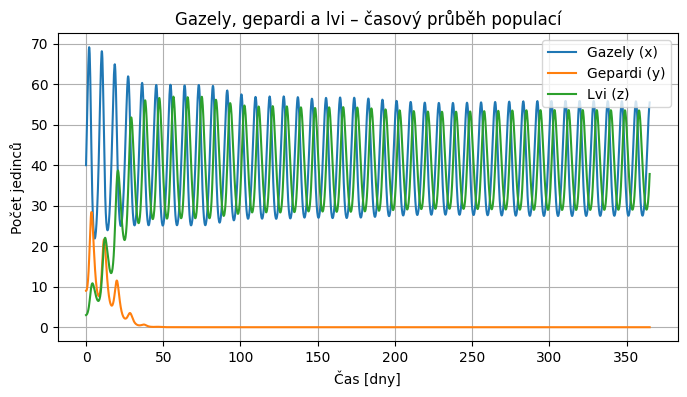

In [12]:
plt.figure(figsize=(8,4))
plt.plot(t, gazely, label='Gazely (x)')
plt.plot(t, gepardi, label='Gepardi (y)')
plt.plot(t, lvi, label='Lvi (z)')
plt.title('Gazely, gepardi a lvi – časový průběh populací')
plt.xlabel('Čas [dny]'); plt.ylabel('Počet jedinců'); plt.legend(); plt.grid(True); plt.show()

## 6 · Fázový diagram (x vs y)

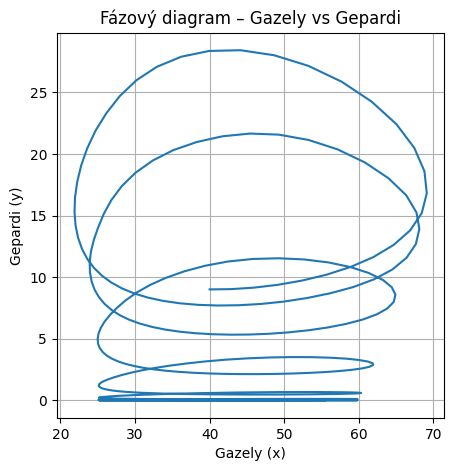

In [13]:
plt.figure(figsize=(5,5))
plt.plot(gazely, gepardi)
plt.title('Fázový diagram – Gazely vs Gepardi')
plt.xlabel('Gazely (x)'); plt.ylabel('Gepardi (y)'); plt.grid(True); plt.show()

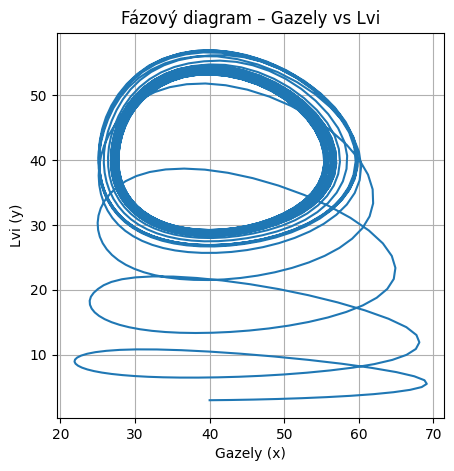

In [14]:
plt.figure(figsize=(5,5))
plt.plot(gazely, lvi)
plt.title('Fázový diagram – Gazely vs Lvi')
plt.xlabel('Gazely (x)'); plt.ylabel('Lvi (y)'); plt.grid(True); plt.show()

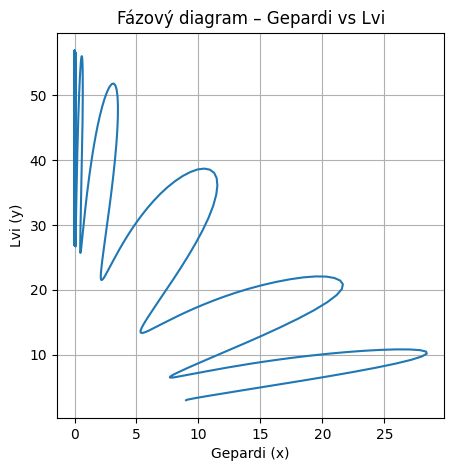

In [16]:
plt.figure(figsize=(5,5))
plt.plot(gepardi, lvi)
plt.title('Fázový diagram – Gepardi vs Lvi')
plt.xlabel('Gepardi (x)'); plt.ylabel('Lvi (y)'); plt.grid(True); plt.show()

## 7 · Interpretace vlivu třetího druhu
1. **Tlumení oscilací predátora 1 (gepardi):** Jakmile se objevují lvi, klesá vrchol gepardí populace – jednak proto, že se dělí o kořist (gazely), jednak protože lvi gepardy přímo loví (termín \(-\varepsilon y z)\).
2. **Zátěž pro kořist:** Gazely nyní čelí dvěma predátorům, takže jejich minima jsou hlubší a zotavení pomalejší.
3. **Lvi stabilizují cyklus:** Třetí rovnice produkuje dodatečný damping; pokud \(\varepsilon\) zvětšíme, cykly se mohou zlomit až k vymření gepardů a stabilní koexistenci gazel–lvů.

### Experimenty
- Zkuste nastavit `eps = 0` → lvi neútočí na gepardy; porovnejte amplitudy gepardů.
- Zkuste `beta2 = 0` → lvi loví jen gepardy; jak se změní soustava?
- Najděte kritickou hodnotu \(\beta_2\), kdy gazely vymřou (<span style='color:red'>tip: vyhledávejte v parametru okolo 0.05</span>).